In [2]:
import ipywidgets as widgets

path = widgets.Text(
    value = 'C:\\Users\\inst\\Documents\\GitHub\\image_segmentation\\data\\Fe3Si_S18_2um.tiff',
    placeholder='Type something',
    description='File path:',
    disabled=False
)

display(path)


Text(value='C:\\Users\\inst\\Documents\\GitHub\\image_segmentation\\data\\Fe3Si_S18_2um.tiff', description='Fi…

In [21]:
%matplotlib inline
import ipyvolume as ipv
import matplotlib.pyplot as plt
from skimage import data, io, filters
import numpy as np

from skimage import data, io, filters
## C:\Users\inst\SynologyDrive\Master\Exp\Hi-am\data\2019-04-10 - Issa - Fe3Si -S08 (unlabelled, green)_2um scan_recon.tiff
stack = io.imread(path.value).T


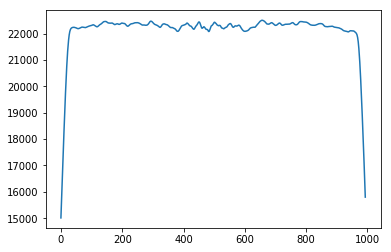

In [22]:
mean_z_intensity = np.mean(stack, axis = (0,1))

fig, ax = plt.subplots()
ax.plot(range(mean_z_intensity.shape[0]), mean_z_intensity)
plt.show()

In [23]:
from rpy2.robjects import FloatVector
from rpy2.robjects.packages import importr

cpt = importr('changepoint')

cpm_result = cpt.multiple_mean_norm(FloatVector(mean_z_intensity),"BinSeg","MBIC",0,2,True,True,1)

change_pts = cpt.cpts(cpm_result)

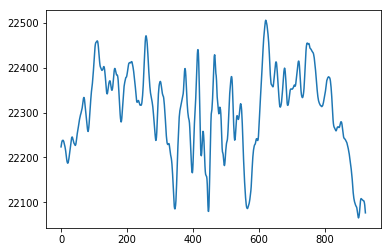

In [24]:
bot = int(change_pts[0])+20
top = int(change_pts[1])-20
cut_warp = mean_z_intensity[bot:top]

fig, ax = plt.subplots()
ax.plot(range(cut_warp.shape[0]), cut_warp)
plt.show()

Text(0.5,1,'crop')

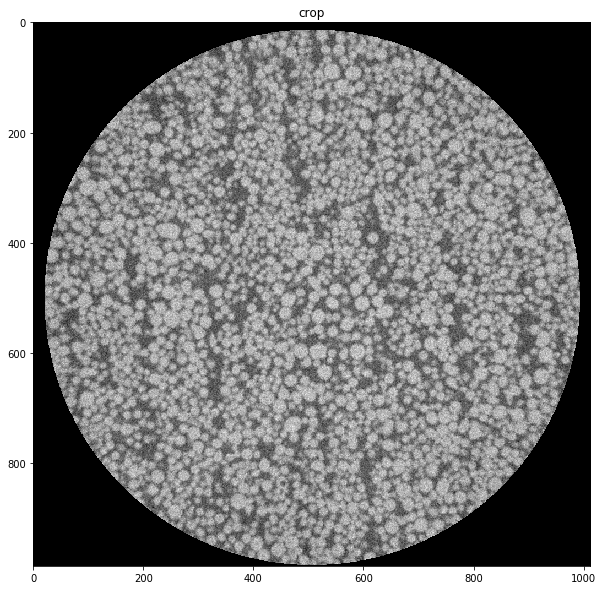

In [25]:
cropped = stack[:,:,bot:top]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cropped[:,:,100], cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('crop')

In [26]:
import numpy.ma as ma
from skimage.filters import threshold_otsu

def density(im):
    masked = ma.masked_where(im == 0, im)
    thresh = threshold_otsu(masked.compressed())

    binary = im < thresh

    new_im = np.copy(im)

    new_im[binary] = 0
    new_im[~binary] = 1

    n_masked = ma.masked_where(im==0,new_im)
    
    return np.mean(n_masked)

z_mean = density(cropped)
print(z_mean)

0.5549648530310923
